# CSCI323 Lab 1 Assignment (2025)
**Content modified by: Cher Lim** (cherl@uow.edu.au)

**Name:** Ng Teng Boon

**7-digit UOW ID**: 8963794

##Instructions:
1. There are three sections (A, B, C) in this notebook.
2. Run the code per section and review the computation results.
3. Answer the questions **supported by your computation results**. Provide **explanation** to your answers to demonstrate your understanding of the relevant concepts.  
4. You will print the entire notebook (answers, computation results) into **PDF and submit to Moodle**.

### A. Exploring the dataset (2 marks)
Review the t-SNE visualization outputs in Section A.

1. List 4 pairs of classes that are heavily overlapped. (1 mark)
2. The t-SNE visualization gives us a 'starting point' view of our data. What can you implement in a basic CNN model to better separate these overlapping classes? Give 5 suggestions. (1 mark)



### Write your answers here:



---


A1.

Based on solely observations made from the scatter plot alone, the 10 clusters are intermixed with each other, which makes formation of clustering very challenging to be clearly observed. However, using the centroid distance matrix, the analysis could be observed more effciently. Classes that are observed to be overlapped are: Cat and Dog (value 1.18), Bird and Horse (value 1.47), Dog and Deer (value 1.61), and Cat and Deer (value 2.06).


---



A2.

To better separate these overlapping classes, we can use data augmentation to make the CNN model more robust to visual changes, add more convolutional layers to learn more complex patterns, use more advanced activation functions to better capture non linearity, use confusion matrix to evaluate correctly classified and misclassified class pairs, as well as reducing dimensionality to form boundaries easier.


---



###B. Training the model (2 marks)
You are provided with a dataset of N samples. You split it into training and validation set with a ratio of 70:30.
You then set the batch_size = k for your training.

1. How many times does the model update its weights? (1 mark)
2. How does batch size affect the model performance? (1 mark)

### Write your answers here:



---


B1.
*   Batch size 4 update 8750 times per epoch
*   Batch size 8 update 4375 times per epoch
*   Batch size 16 update 2187 times per epoch
*   Batch size 32 update 1093 times per epoch
*   Batch size 64 update 546 times per epoch
*   Batch size 128 update 273 times per epoch



---



B2.

Smaller k values like 4 or 8 results in more frequent updates but slower training per epoch. As for larger k values like 64 or 128, it results in fewer updates but faster training per epoch. This can be proven by the output provided at the bottom of the page.


---



### C. Role of activation function (6 marks)
You will train 3 CNN models:
* A standard CNN model with no activation function at the output layer.
* A non-standard CNN model with ReLU at the output layer.
* A non-standard CNN model with Tanh at the output layer.

Answer the following questions. Your answers must be supported by the **computation results** of your codes and the relevant concepts.

1. For each model above, discuss the impact on the output distribution and model performance. (3 marks)

2. Should an activation function be placed at the output layer prior to SoftMax? Explain your answer. (3 marks)

### Write your answers here:



---


C1.

**Standard CNN**:
* Performance:
Achieved the highest test accuracy at 54.45%.
Per-class results were strong for categories like car (83.9%), dog (70.1%), and plane (68.7%), though it struggled more with cat (26.3%) and a few others.

* Confusion Matrix Insight:
The confusion matrix shows clear diagonal dominance, especially in well-performing classes like car and dog, suggesting the model made confident and accurate predictions. However, there was still noticeable confusion in classes like cat, deer, and frog.

* Saliency Maps:
The model consistently highlighted relevant regions of the image, such as the outline of the ship or the face of the cat. The heatmaps were clear and reliable across different examples.

* Logits:
The logits contain both positive and negative values, suggesting a healthy spread of confidence across classes without any artificially skew.

---



**CNN model with ReLU**:
* Performance:
Slightly lower test accuracy at 52.45%.
Per-class accuracy dropped for high-performing classes like car (60.8%) and dog (48.1%), though horse (77.0%) improved.


* Confusion Matrix Insight:
There was stronger confusion between similar categories (dog and horse, truck and car). The diagonal of the confusion matrix was less dominant, showing less confident classification in overall.

* Saliency Maps:
Heatmaps appear more spread out and less focused, especially in ship and plane samples. The attention was spread across the background and less focused on the actual object. This implies the model is not always sure on what to prioritize.

* Logits:
All logits were non-negative, with no negative values, which likely reduced the contrast between classes, therefore making it harder for Softmax to  emphasize the correct class.


---



**CNN model with Tanh**:
* Performance:
Lowest test accuracy at 50.03%.
Per-class performance was highly inconsistent. Some classes like frog (71.7%) performed unexpectedly well, but others like dog (39.5%), deer (32.5%), and car (55.9%) had much lower accuracy.

* Confusion Matrix Insight:
The confusion matrix showed widespread misclassifications, with many off diagonal values. Strong signs of class confusion. The predictions were scattered, and the model struggled to consistently identify the correct class.

* Saliency Maps:
Maps are unfocused, blurry and hazy, with attention spread across irrelevant parts of the image. In the “cat” and “ship” samples, the model failed to focus onto the object. This implies that it had difficulty identifying which features were important.

* Logits:
Logits were compressed between -1 and 1, with 67.5% being negative values. Because of this, the softmax layer received low-contrast inputs, therefore resulting in the model's uncertainty about which class to choose.


---



C2.

No. An activation function should not be placed at the output layer prior to SoftMax. The following were observed:

Standard CNN:

Had the best results across accuracy, class-level performance, confusion matrix structure, and attention clarity.

CNN with ReLU:

Eliminated negative scores, limiting contrast and harming softmax performance.

CNN with Tanh:

Tanh compressed all logits, reducing score range and expressiveness.

As shown by the outputs, applying ReLU and Tanh at the final layer alters the value distribution in ways that impair both training and interpretability.


---



#Learning objectives:

1. Extracts insights from a database.
2. Translate insights into a game plan.
3. Understanding the architecture of a basic CNN.
4. Interpret the training process of a neural network model.
5. Investigate the impact of activation functions at the OUTPUT layer of a CNN model.

A. Exploring the dataset
=====================

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a `torch.*Tensor`.

-   For images, packages such as Pillow, OpenCV are useful
-   For audio, packages such as scipy and librosa
-   For text, either raw Python or Cython based loading, or NLTK and
    SpaCy are useful

Specifically for vision, we have created a package called `torchvision`,
that has data loaders for common datasets such as ImageNet, CIFAR10,
MNIST, etc. and data transformers for images, viz.,
`torchvision.datasets` and `torch.utils.data.DataLoader`.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset. It has the classes:
'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
'ship', 'truck'. The images in CIFAR-10 are of size 3x32x32, i.e.
3-channel color images of 32x32 pixels in size.

![cifar10](https://pytorch.org/tutorials/_static/img/cifar10.png)



### A-1. Load and normalize CIFAR10

Using `torchvision`, it's extremely easy to load CIFAR10.


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

#### Normalize dataset images during loading

Normalizing dataset images during loading is a *standard practice in deep learning*. **It converts original pixel values range from [0,1] to [-1,1].**

Benefits include:
* Centers the data around zero
* Makes the input distribution more symmetrical.
* Makes the data more compatible with activation functions.

To normalise the image during loading:

1. ToTensor(): Converts images from PIL format (0-255 range) to torch tensors with values in [0, 1]
2. Normalize(): Applies the formula: **(x - mean) / std** to each channel

Given:
* mean = (0.5, 0.5, 0.5)
* std = (0.5, 0.5, 0.5)

Using the formula in (2), normalized_x = (x - 0.5) / 0.5.

Hence, **normalized_x = 2x - 1**

Original pixel values range [0, 1] now becomes [-1, 1].

To display the images using Matplotlib, we need to **unnormalize** the image. That means we are solving for x.

x = (normalized_x + 1) / 2

Hence, x = (normalized_x / 2) +  0.5  (formula used in the code).

*Let's test*: normalized_x range [-1,1], x range [0,1]. So that's correct!

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Each batch has 4 samples. Hence, 12,500 (=50k/4) batches per epoch.
# Model updates its weights once per batch, so 12,500 updates per epoch.
batch_size = 4


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### A-2. Check out the dataset

In [ ]:
from collections import Counter

In [ ]:
# 1. Dataset size
print(f"Training set size: {len(trainset)} images")
print(f"Test set size: {len(testset)} images")
print(f"Total dataset size: {len(trainset) + len(testset)} images")

# 2. Image dimensions
sample_image, _ = trainset[0]
print(f"Image dimensions: {sample_image.shape}")
print(f"Image type: {sample_image.dtype}")

# 3. Class distribution
train_labels = [label for _, label in trainset]
label_counts = Counter(train_labels)

print("\nClass distribution in training set:")
for class_idx, count in label_counts.items():
    print(f"Class {classes[class_idx]}: {count} images")

Training set size: 50000 images
Test set size: 10000 images
Total dataset size: 60000 images
Image dimensions: torch.Size([3, 32, 32])
Image type: torch.float32

Class distribution in training set:
Class frog: 5000 images
Class truck: 5000 images
Class deer: 5000 images
Class car: 5000 images
Class bird: 5000 images
Class horse: 5000 images
Class ship: 5000 images
Class cat: 5000 images
Class dog: 5000 images
Class plane: 5000 images


Let us show some of the training images, for fun.


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

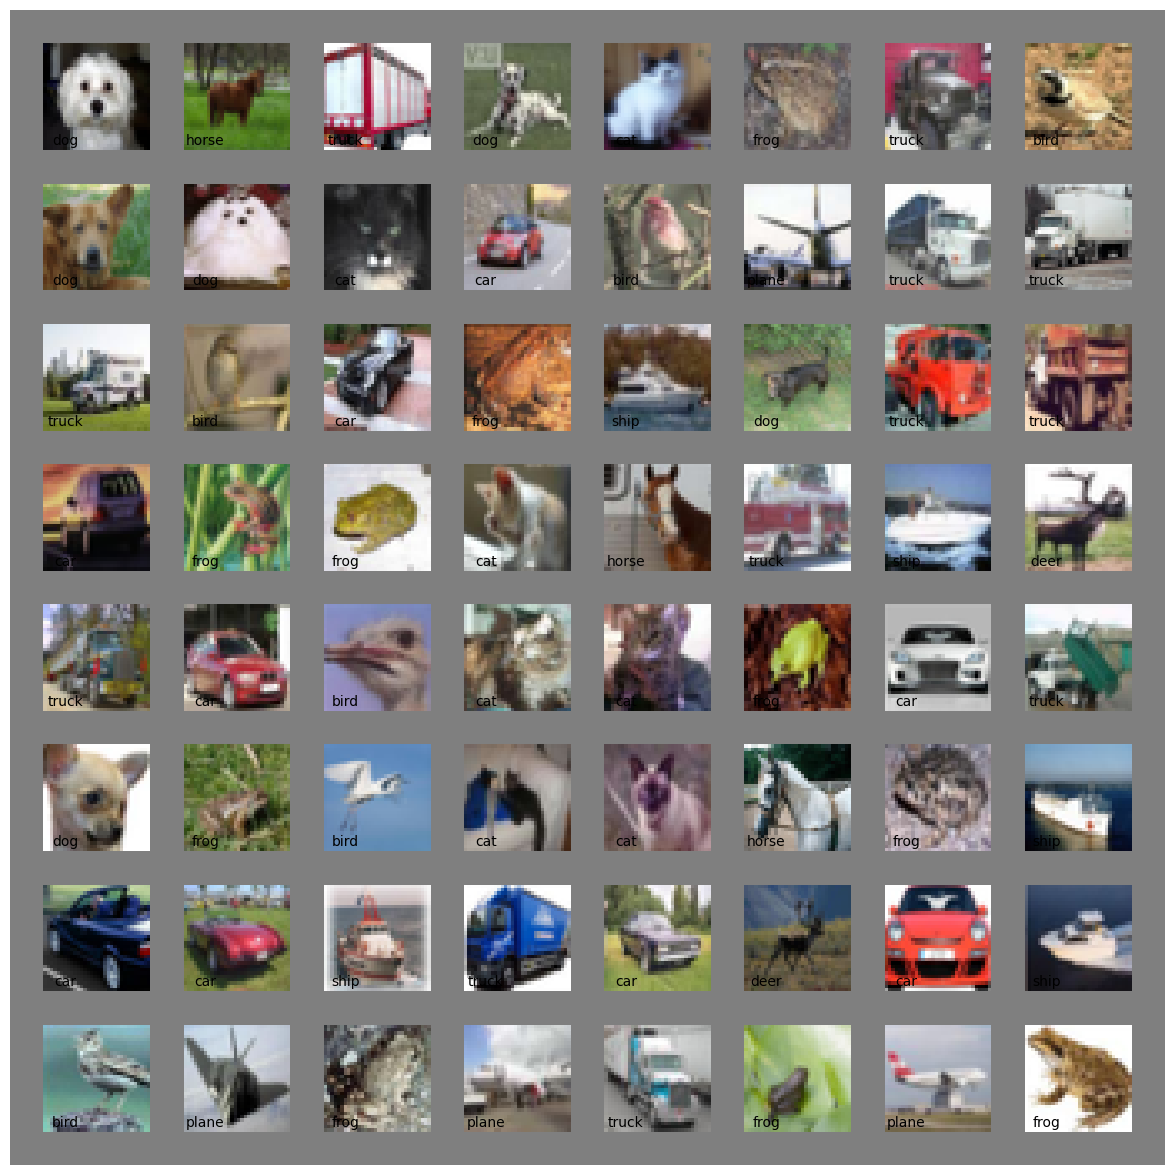

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def show_image_grid(images, labels, nrow=8):  # Changed nrow to 5 for a 5x5 grid
    img_grid = torchvision.utils.make_grid(images, nrow=nrow, padding=10)
    img_grid = img_grid / 2 + 0.5  # unnormalize
    npimg = img_grid.numpy()

    plt.figure(figsize=(15, 15))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

    # Add class labels as text
    for i, label in enumerate(labels[:len(images)]):
        row = i // nrow
        col = i % nrow
        plt.text(col * (32 + 10) + 16, row * (32 + 10) + 40,
                 classes[label], ha='center')

    plt.show()

# Usage with 25 images
images_list = []
labels_list = []
for i in range(64):  # Get 25 images
    if i % 4 == 0:
        dataiter = iter(trainloader)
    img, lbl = next(dataiter)
    images_list.append(img[0])
    labels_list.append(lbl[0])

show_image_grid(images_list, labels_list)

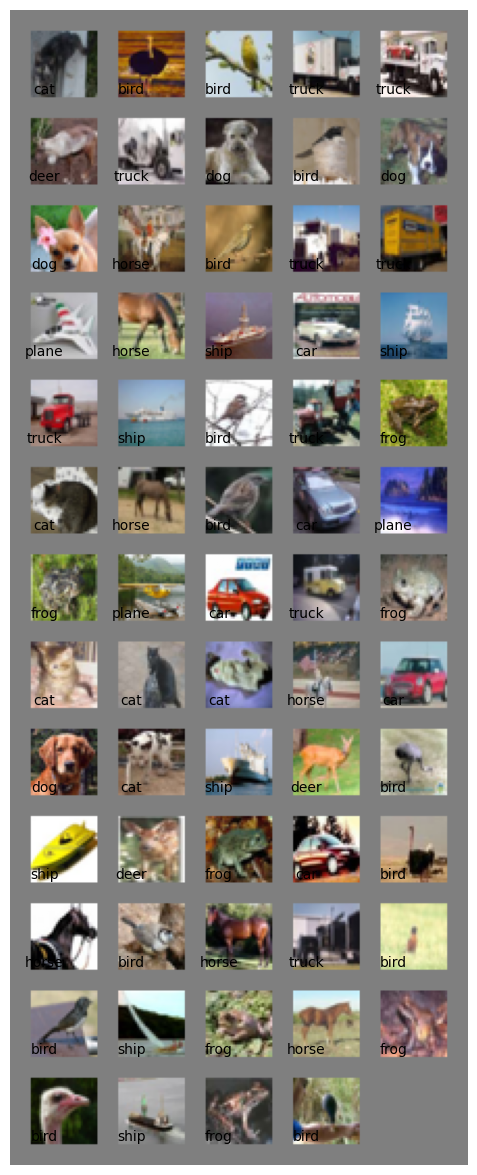

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def show_image_grid(images, labels, nrow=5):  # Changed nrow to 5 for a 5x5 grid
    img_grid = torchvision.utils.make_grid(images, nrow=nrow, padding=10)
    img_grid = img_grid / 2 + 0.5  # unnormalize
    npimg = img_grid.numpy()

    plt.figure(figsize=(15, 15))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

    # Add class labels as text
    for i, label in enumerate(labels[:len(images)]):
        row = i // nrow
        col = i % nrow
        plt.text(col * (32 + 10) + 16, row * (32 + 10) + 40,
                 classes[label], ha='center')

    plt.show()

# Usage with 25 images
images_list = []
labels_list = []
for i in range(64):  # Get 25 images
    if i % 4 == 0:
        dataiter = iter(trainloader)
    img, lbl = next(dataiter)
    images_list.append(img[0])
    labels_list.append(lbl[0])

show_image_grid(images_list, labels_list)

### A-3. Run t-SNE on raw pixel values
When you run t-SNE on raw pixel values, each image in CIFAR-10 starts as a high-dimensional vector (**3,072 dimensions for 32×32×3 RGB images**).

The t-SNE algorithm then finds a way to project these high-dimensional points onto a 2D plane while trying to preserve the relative distances between points. (Similar to the idea of PCA).

The x and y axes in the resulting plot are simply the two dimensions that t-SNE creates to represent the data.

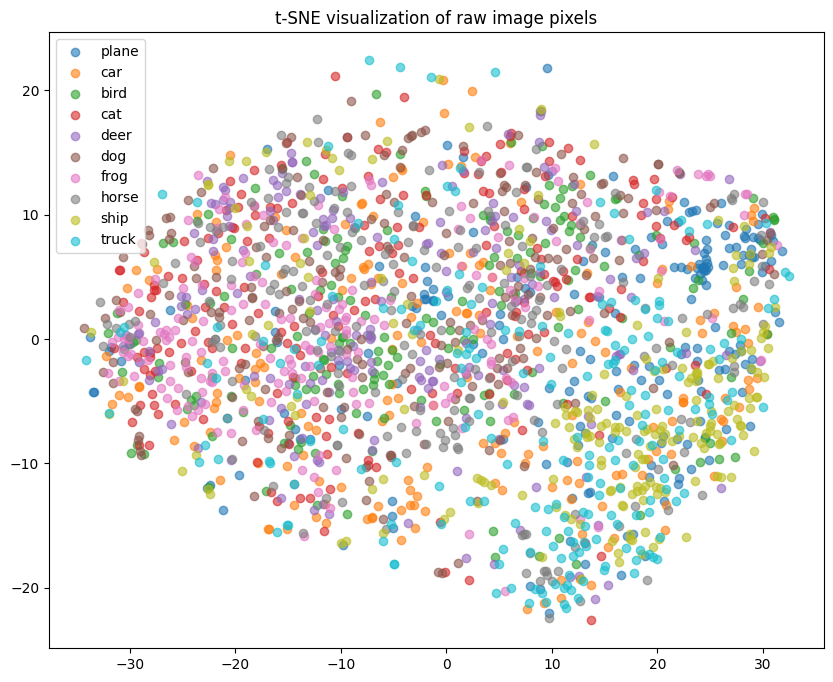

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get a subset of images (for speed)
subset_size = 2000
np.random.seed(42) #Added in to avoid random sampling
subset_indices = np.random.choice(len(trainset), subset_size, replace=False)

# Extract raw images and labels
images = []
labels = []
for idx in subset_indices:
    img, label = trainset[idx]
    # Flatten the image to a vector
    images.append(img.view(-1).numpy())
    labels.append(label)

images = np.array(images)
labels = np.array(labels)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
images_tsne = tsne.fit_transform(images)

# Plot
plt.figure(figsize=(10, 8))
for i in range(10):
    indices = labels == i
    plt.scatter(images_tsne[indices, 0], images_tsne[indices, 1], label=classes[i], alpha=0.6)


plt.legend()
plt.title('t-SNE visualization of raw image pixels')
plt.show()

### A-4. Calculate the Euclidean distance between each pair of classes

In [ ]:
from sklearn.metrics import pairwise_distances
import pandas as pd

centroids = []
for i in range(10):
    class_points = images_tsne[labels == i]
    centroid = class_points.mean(axis=0)
    centroids.append(centroid)

# Calculate pairwise distances
dist_matrix = pairwise_distances(centroids)

# Create labeled DataFrame
dist_df = pd.DataFrame(dist_matrix, index=classes, columns=classes)

# Print the matrix (rounded for clarity)
print("\nPairwise class centroid distances in t-SNE space (rounded):\n")
print(dist_df.to_string(formatters={col: '{:.2f}'.format for col in dist_df.columns}))


Pairwise class centroid distances in t-SNE space (rounded):

      plane   car  bird   cat  deer   dog  frog horse  ship truck
plane  0.00 12.30 14.48 18.89 16.98 17.88 22.03 13.19  4.32  7.51
car   12.30  0.00  4.46  8.42  6.39  7.89 10.49  3.19 11.24  7.97
bird  14.48  4.46  0.00  4.49  2.51  3.67  7.61  1.47 14.57 11.95
cat   18.89  8.42  4.49  0.00  2.06  1.18  3.82  5.93 19.05 16.28
deer  16.98  6.39  2.51  2.06  0.00  1.61  5.19  3.90 17.01 14.22
dog   17.88  7.89  3.67  1.18  1.61  0.00  4.99  5.14 18.21 15.60
frog  22.03 10.49  7.61  3.82  5.19  4.99  0.00  8.84 21.66 18.43
horse 13.19  3.19  1.47  5.93  3.90  5.14  8.84  0.00 13.12 10.48
ship   4.32 11.24 14.57 19.05 17.01 18.21 21.66 13.12  0.00  4.16
truck  7.51  7.97 11.95 16.28 14.22 15.60 18.43 10.48  4.16  0.00


# B. Define a Convolutional Neural Network


1. The following section consists of **two identical CNN models** except one has ReLU after the final layer.
2. You will train both models and tracks their loss curves
Evaluates their performance on the test set
3. You will visualise:
  * Training loss comparison
  * Output value distributions (showing how ReLU truncates negative values)
  * Example outputs for specific classes with and without ReLU
4. You will compare accuracy overall and for each class

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Define standard model without ReLU at final layer
class NetStandard(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # No ReLU here
        return x

In [ ]:
# Define model with ReLU at final layer
class NetWithFinalReLU(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        #self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))  # ReLU added here
        #x = self.leaky_relu(self.fc3(x))  # LeakyReLU applied here
        #x = torch.tanh(self.fc3(x))  # Tanh applied here
        return x

In [ ]:
# Define model using Tanh at the final layer
class NetWithFinalTanh(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        #self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        return x

In [ ]:
# Training function
def train_model(net, trainloader, epochs=2):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    losses = []
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 2000 == 1999:
                avg_loss = running_loss / 2000
                losses.append(avg_loss)
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {avg_loss:.3f}')
                running_loss = 0.0

    print('Finished Training')
    return losses

In [ ]:
# Function to get example outputs
def get_sample_outputs(net, testloader):
    # Get a batch from the testloader
    dataiter = iter(testloader)
    images, labels = next(dataiter)

    # Get outputs
    outputs = net(images)

    return outputs, labels

### B-1. Training the model

In [ ]:
# Train both models
print("Training standard model (without final ReLU)...")
net_standard = NetStandard()
losses_standard = train_model(net_standard, trainloader)

print("\nTraining model with final ReLU...")
net_with_relu = NetWithFinalReLU()
losses_with_relu = train_model(net_with_relu, trainloader)

# Train model with final Tanh
print("\nTraining model with final Tanh...")
net_with_tanh = NetWithFinalTanh()
losses_with_tanh = train_model(net_with_tanh, trainloader)

Training standard model (without final ReLU)...
[1,  2000] loss: 2.184
[1,  4000] loss: 1.822
[1,  6000] loss: 1.662
[1,  8000] loss: 1.575
[1, 10000] loss: 1.512
[1, 12000] loss: 1.452
[2,  2000] loss: 1.385
[2,  4000] loss: 1.359
[2,  6000] loss: 1.335
[2,  8000] loss: 1.310
[2, 10000] loss: 1.291
[2, 12000] loss: 1.258
Finished Training

Training model with final ReLU...
[1,  2000] loss: 2.254
[1,  4000] loss: 2.037
[1,  6000] loss: 1.788
[1,  8000] loss: 1.666
[1, 10000] loss: 1.584
[1, 12000] loss: 1.506
[2,  2000] loss: 1.457
[2,  4000] loss: 1.416
[2,  6000] loss: 1.385
[2,  8000] loss: 1.364
[2, 10000] loss: 1.362
[2, 12000] loss: 1.328
Finished Training

Training model with final Tanh...
[1,  2000] loss: 2.229
[1,  4000] loss: 1.994
[1,  6000] loss: 1.869
[1,  8000] loss: 1.799
[1, 10000] loss: 1.752
[1, 12000] loss: 1.717
[2,  2000] loss: 1.681
[2,  4000] loss: 1.666
[2,  6000] loss: 1.636
[2,  8000] loss: 1.623
[2, 10000] loss: 1.606
[2, 12000] loss: 1.595
Finished Training


### B-2. Save the models

In [ ]:
PATH_S = './cifar_net_standard.pth'
torch.save(net_standard.state_dict(), PATH_S)
PATH_R = './cifar_net_with_relu.pth'
torch.save(net_with_relu.state_dict(), PATH_R)

Next, let\'s load back in our saved model (note: saving and re-loading
the model wasn\'t necessary here, we only did it to illustrate how to do
so):


In [ ]:
#net = net_standard()
net_standard.load_state_dict(torch.load(PATH_S, weights_only=True))
net_with_relu.load_state_dict(torch.load(PATH_R, weights_only=True))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above
are:


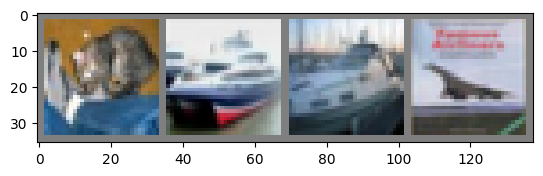

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
outputs_samples = net_standard(images)
outputs_samples_relu = net_with_relu(images)
outputs_samples_tanh = net_with_tanh(images)

In [ ]:
# Predicting with standard
_, predicted = torch.max(outputs_samples, 1)

print('S predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

# Predicting with relu
_, predicted = torch.max(outputs_samples_relu, 1)

print('R predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

# Predicting with tanh
_, predicted = torch.max(outputs_samples_tanh, 1)

print('T predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

S predicted:  cat   ship  ship  plane
R predicted:  bird  ship  ship  ship 
T predicted:  cat   plane ship  ship 


#C. Investigate the impact of activation functions at the OUTPUT layer of a CNN model

### C-1. Visualize the training loss and Logit values of both models

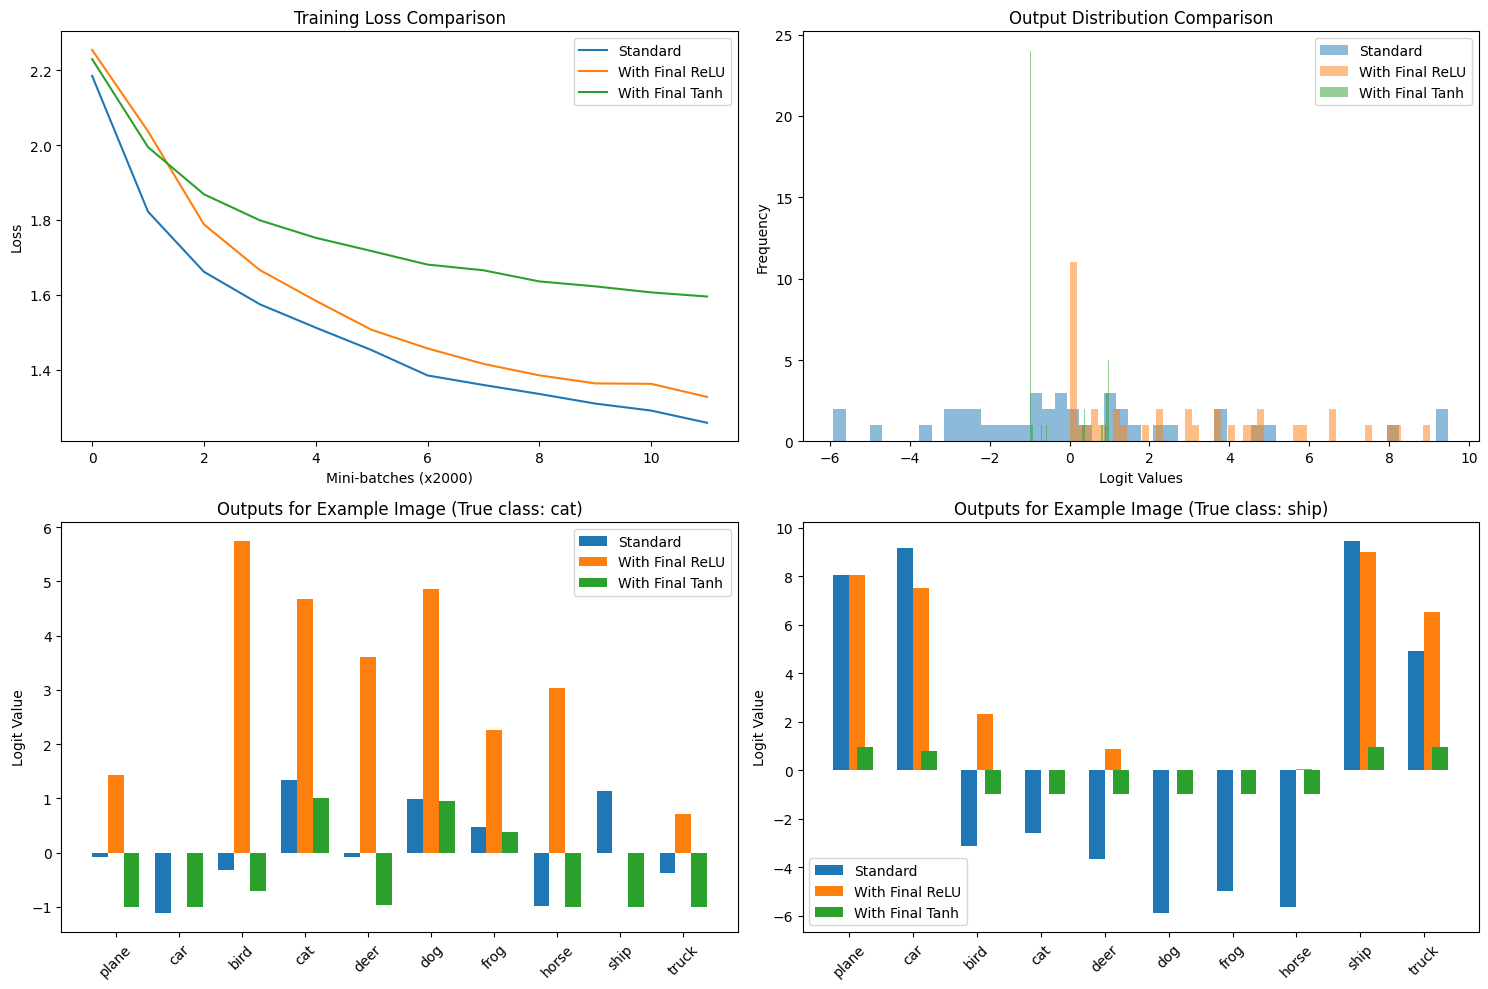

In [ ]:
# Get sample outputs
outputs_standard, labels = get_sample_outputs(net_standard, testloader)
outputs_with_relu, _ = get_sample_outputs(net_with_relu, testloader)
outputs_with_tanh, _ = get_sample_outputs(net_with_tanh, testloader) #self added in

# Convert to numpy for plotting
outputs_standard_np = outputs_standard.detach().numpy()
outputs_with_relu_np = outputs_with_relu.detach().numpy()
outputs_with_tanh_np = outputs_with_tanh.detach().numpy()
labels_np = labels.numpy()

# Visualize
plt.figure(figsize=(15, 10))

# Plot loss curves
plt.subplot(2, 2, 1)
plt.plot(losses_standard, label='Standard')
plt.plot(losses_with_relu, label='With Final ReLU')
plt.plot(losses_with_tanh, label='With Final Tanh')
plt.title('Training Loss Comparison')
plt.xlabel('Mini-batches (x2000)')
plt.ylabel('Loss')
plt.legend()

# Plot output distributions (histogram of logits)
plt.subplot(2, 2, 2)
plt.hist(outputs_standard_np.flatten(), bins=50, alpha=0.5, label='Standard')
plt.hist(outputs_with_relu_np.flatten(), bins=50, alpha=0.5, label='With Final ReLU')
plt.hist(outputs_with_tanh_np.flatten(), bins=50, alpha=0.5, label='With Final Tanh')
plt.title('Output Distribution Comparison')
plt.xlabel('Logit Values')
plt.ylabel('Frequency')
plt.legend()

# Example comparison for specific images
plt.subplot(2, 2, 3)
example_idx = 0  # Select first image from batch
# Plot the output values for this example
standard_values = outputs_standard_np[example_idx]
relu_values = outputs_with_relu_np[example_idx]
tanh_values = outputs_with_tanh_np[example_idx]
true_label = labels_np[example_idx]

x = np.arange(10)
width = 0.25 #previously 0.35

plt.bar(x - width, standard_values, width, label='Standard')
plt.bar(x, relu_values, width, label='With Final ReLU')
plt.bar(x + width, tanh_values, width, label='With Final Tanh')
plt.title(f'Outputs for Example Image (True class: {classes[true_label]})')
plt.xticks(x, classes, rotation=45)
plt.ylabel('Logit Value')
plt.legend()

# Add another example with a different class
plt.subplot(2, 2, 4)
for i in range(1, len(labels_np)):
    if labels_np[i] != labels_np[0]:  # Find example with different class
        example_idx = i
        break
else:
    example_idx = 1  # Fallback if all same class

standard_values = outputs_standard_np[example_idx]
relu_values = outputs_with_relu_np[example_idx]
tanh_values = outputs_with_tanh_np[example_idx]
true_label = labels_np[example_idx]

plt.bar(x - width/2, standard_values, width, label='Standard')
plt.bar(x + width/2, relu_values, width, label='With Final ReLU')
plt.bar(x + width, tanh_values, width, label='With Final Tanh')
plt.title(f'Outputs for Example Image (True class: {classes[true_label]})')
plt.xticks(x, classes, rotation=45)
plt.ylabel('Logit Value')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Get outputs from the model
outputs = net_with_relu(images)
print("Sample logits (first sample):", outputs[0])
print(f"Min logit: {outputs.min().item():.4f}")
print(f"Max logit: {outputs.max().item():.4f}")

# Convert to NumPy array for analysis
outputs_np = outputs.detach().numpy().flatten()

# Count total and negative logits
total_logits = outputs_np.size
num_negatives = np.sum(outputs_np < 0)

print(f"Total number of logit values: {total_logits}")
print(f"Number of negative logit values: {num_negatives}")
print(f"Percentage of negative values: {100 * num_negatives / total_logits:.2f}%")


Sample logits (first sample): tensor([1.4393, 0.0000, 5.7526, 4.6780, 3.6128, 4.8560, 2.2688, 3.0385, 0.0000,
        0.7199], grad_fn=<SelectBackward0>)
Min logit: 0.0000
Max logit: 9.0214
Total number of logit values: 40
Number of negative logit values: 0
Percentage of negative values: 0.00%


In [ ]:
# Get outputs from the Tanh model
outputs_tanh = net_with_tanh(images)
print("=== Tanh Model ===")
print("Sample logits (first sample):", outputs_tanh[0])
print(f"Min logit: {outputs_tanh.min().item():.4f}")
print(f"Max logit: {outputs_tanh.max().item():.4f}")

# Convert to NumPy array for analysis
outputs_tanh_np = outputs_tanh.detach().numpy().flatten()

# Count total and negative logits
total_logits_tanh = outputs_tanh_np.size
num_negatives_tanh = np.sum(outputs_tanh_np < 0)

print(f"Total number of logit values: {total_logits_tanh}")
print(f"Number of negative logit values: {num_negatives_tanh}")
print(f"Percentage of negative values: {100 * num_negatives_tanh / total_logits_tanh:.2f}%")

=== Tanh Model ===
Sample logits (first sample): tensor([-1.0000, -1.0000, -0.7064,  0.9991, -0.9708,  0.9536,  0.3809, -0.9993,
        -0.9927, -1.0000], grad_fn=<SelectBackward0>)
Min logit: -1.0000
Max logit: 0.9995
Total number of logit values: 40
Number of negative logit values: 27
Percentage of negative values: 67.50%


### C-2. Evaluate the models on test data

In [ ]:
# Evaluate both models
def evaluate_model(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test images: {accuracy:.2f}%')
    return accuracy

# Evaluate and print accuracy comparison
print("\nEvaluating standard model (without final ReLU)...")
accuracy_standard = evaluate_model(net_standard, testloader)

print("\nEvaluating model with final ReLU...")
accuracy_with_relu = evaluate_model(net_with_relu, testloader)

print("\nEvaluating model with final Tanh...")
accuracy_with_tanh = evaluate_model(net_with_tanh, testloader)

print("\nAccuracy Comparison:")
print(f"Standard Model: {accuracy_standard:.2f}%")
print(f"Model with Final ReLU: {accuracy_with_relu:.2f}%")
print(f"Model with Final Tanh: {accuracy_with_tanh:.2f}%")


Evaluating standard model (without final ReLU)...
Accuracy on test images: 54.45%

Evaluating model with final ReLU...
Accuracy on test images: 52.45%

Evaluating model with final Tanh...
Accuracy on test images: 50.03%

Accuracy Comparison:
Standard Model: 54.45%
Model with Final ReLU: 52.45%
Model with Final Tanh: 50.03%


### C-3. Accuracy per class in standard CNN model (without ReLU at output layer)


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# checking the CNN without ReLU at output
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_standard(images) # checking the CNN without ReLU at output
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 68.7 %
Accuracy for class: car   is 83.9 %
Accuracy for class: bird  is 39.1 %
Accuracy for class: cat   is 26.3 %
Accuracy for class: deer  is 30.1 %
Accuracy for class: dog   is 70.1 %
Accuracy for class: frog  is 58.8 %
Accuracy for class: horse is 54.5 %
Accuracy for class: ship  is 55.3 %
Accuracy for class: truck is 57.7 %


### C-4. Accuracy per class in CNN model with ReLU at output layer

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# checking the CNN without ReLU at output
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_with_relu(images) # checking the CNN with ReLU at output
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 53.3 %
Accuracy for class: car   is 60.8 %
Accuracy for class: bird  is 49.2 %
Accuracy for class: cat   is 17.3 %
Accuracy for class: deer  is 52.9 %
Accuracy for class: dog   is 48.1 %
Accuracy for class: frog  is 45.8 %
Accuracy for class: horse is 77.0 %
Accuracy for class: ship  is 65.5 %
Accuracy for class: truck is 54.6 %


### C-5. Accuracy per class in CNN model with Tanh at output layer

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# checking the CNN with Tanh at output
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_with_tanh(images)  # checking the CNN with Tanh at output
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 62.0 %
Accuracy for class: car   is 55.9 %
Accuracy for class: bird  is 33.4 %
Accuracy for class: cat   is 46.2 %
Accuracy for class: deer  is 32.5 %
Accuracy for class: dog   is 39.5 %
Accuracy for class: frog  is 71.7 %
Accuracy for class: horse is 56.9 %
Accuracy for class: ship  is 53.3 %
Accuracy for class: truck is 48.9 %


### C-6. Confusion matrix for standard CNN model (without ReLU at output layer)


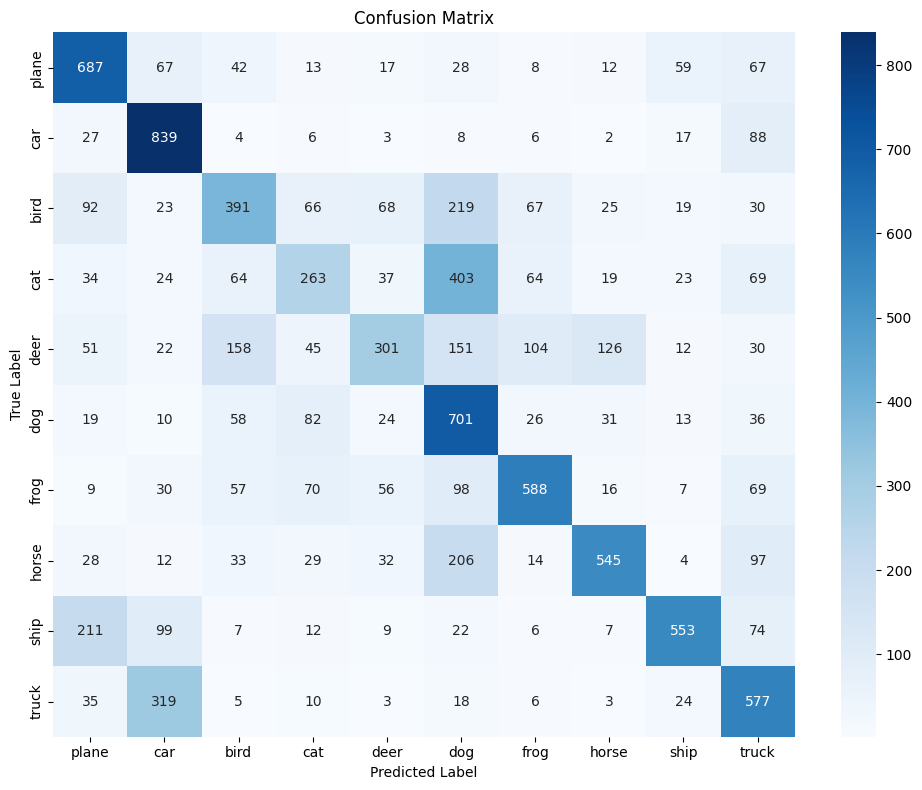

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Assuming: net is your trained model, testloader is your DataLoader, and classes is a list of class names
net_standard.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = net_standard(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### C-7.  Confusion matrix for CNN model with ReLU at output layer

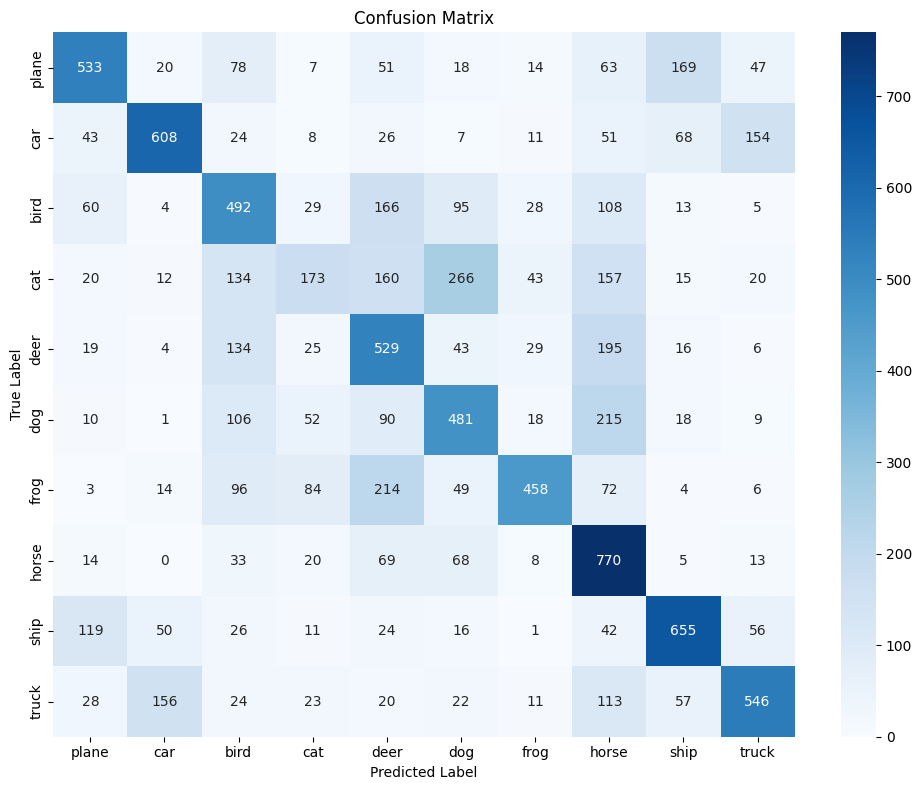

In [ ]:
# Assuming: net is your trained model, testloader is your DataLoader, and classes is a list of class names
net_with_relu.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = net_with_relu(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### C-8. Confusion matrix for CNN model with Tanh at output layer

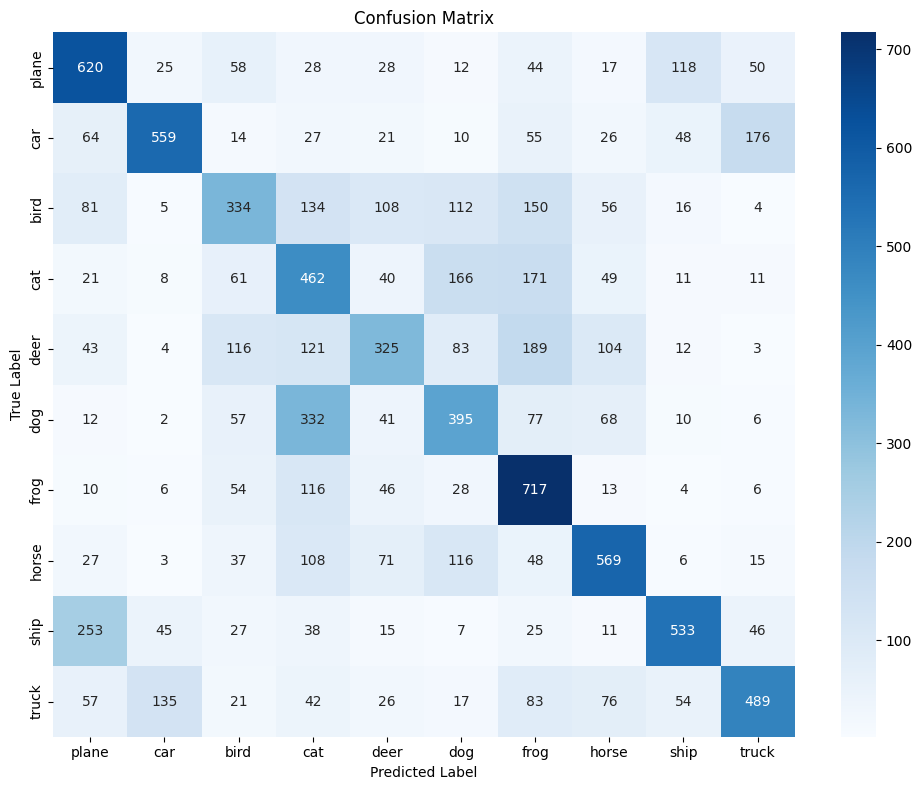

In [ ]:
# Assuming: net is your trained model, testloader is your DataLoader, and classes is a list of class names
net_with_tanh.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = net_with_tanh(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# C-9. Saliency maps using GradCam
A saliency map highlights which regions of an image most influenced the model's classification decision. The **warmer colors (red, yellow) indicate areas of high importance**, while cooler colors (blue, green) show less influential regions.

When generating saliency maps, we're **visualizing the gradient flow back** through these activation functions to the input image. Different activation functions create different gradient landscapes.

Study the saliency map for the different models (standard CNN vs non-standard CNN). **What do you observe?**

In [ ]:
!pip install grad-cam

In [ ]:
# Import necessary libraries
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
import matplotlib.pyplot as plt
import numpy as np
import torch


In [ ]:
def visualize_saliency_maps(net, name):
    """
    Generate and display saliency maps for a given model

    Args:
        net: The trained model
        name: Name of the model for display purposes
    """
    # Select the target layer for visualization (last convolutional layer)
    target_layer = [net.conv2]

    # Initialize GradCAM
    cam = GradCAM(model=net, target_layers=target_layer)

    # Get a batch of test images
    dataiter = iter(testloader)
    images, labels = next(dataiter)

    # Get model predictions
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    # Create a figure to display images and their saliency maps
    fig, axes = plt.subplots(4, 2, figsize=(12, 16))
    fig.suptitle(f'Saliency Maps for {name}', fontsize=16)

    for i in range(4):  # Process first 4 images of the batch
        # Original image
        img = images[i].cpu().numpy().transpose(1, 2, 0)
        img = img / 2 + 0.5  # unnormalize

        # Create saliency map
        input_tensor = images[i].unsqueeze(0)  # Add batch dimension
        grayscale_cam = cam(input_tensor=input_tensor, targets=None)
        grayscale_cam = grayscale_cam[0, :]

        # Overlay saliency map on original image
        visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)

        # Display original image
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f'Original: {classes[labels[i]]}')
        axes[i, 0].axis('off')

        # Display saliency map
        axes[i, 1].imshow(visualization)
        axes[i, 1].set_title(f'Predicted: {classes[predicted[i]]}')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()


Generating saliency maps for standard model (without final ReLU)...


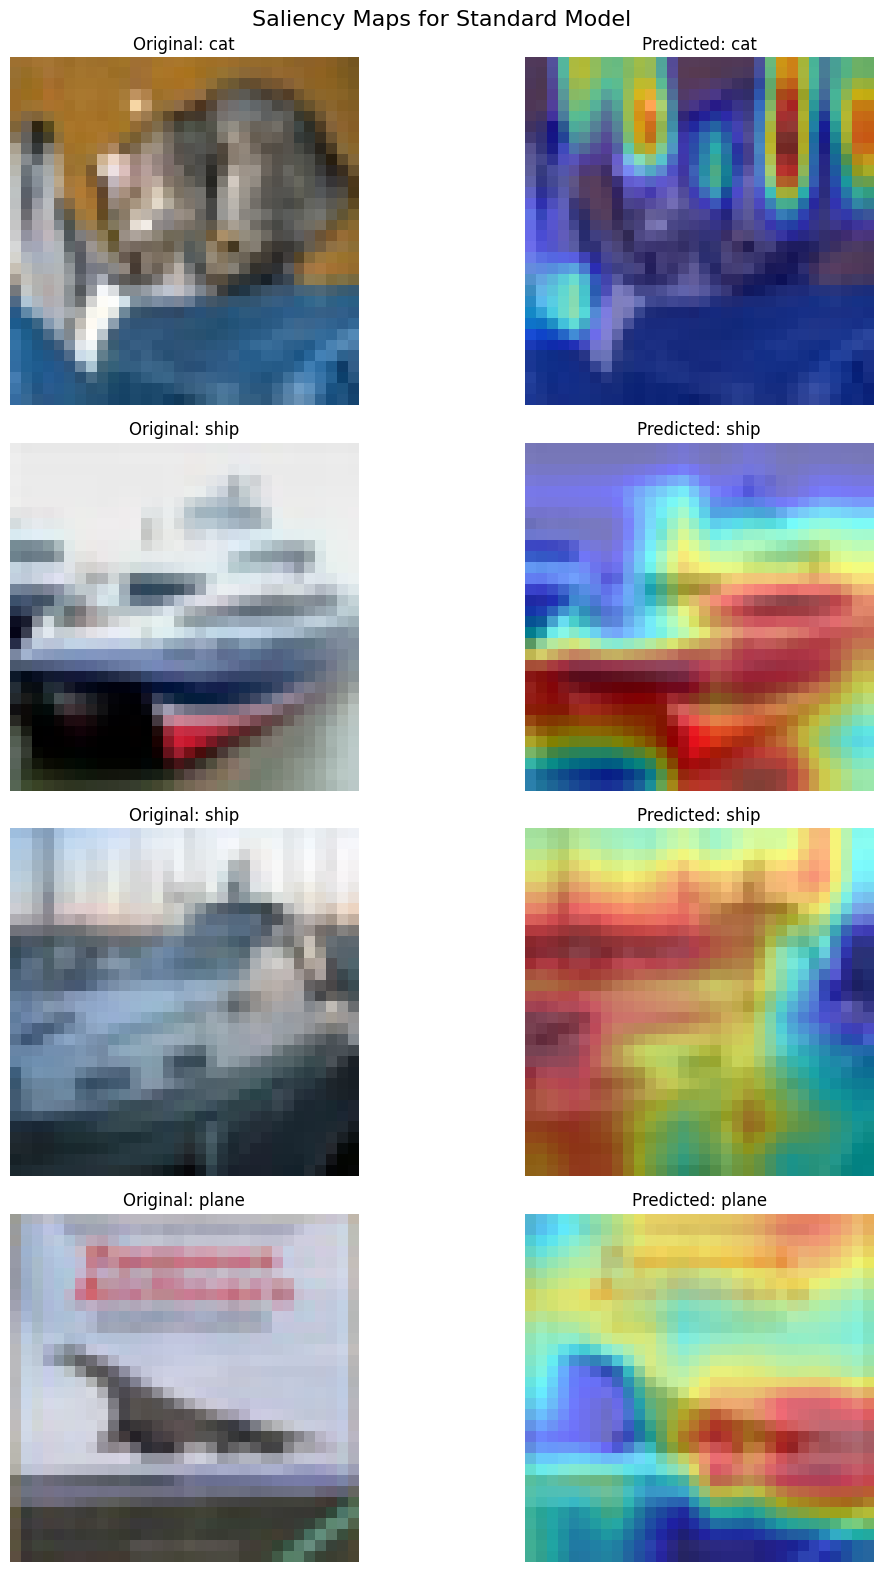


Generating saliency maps for model with final ReLU...


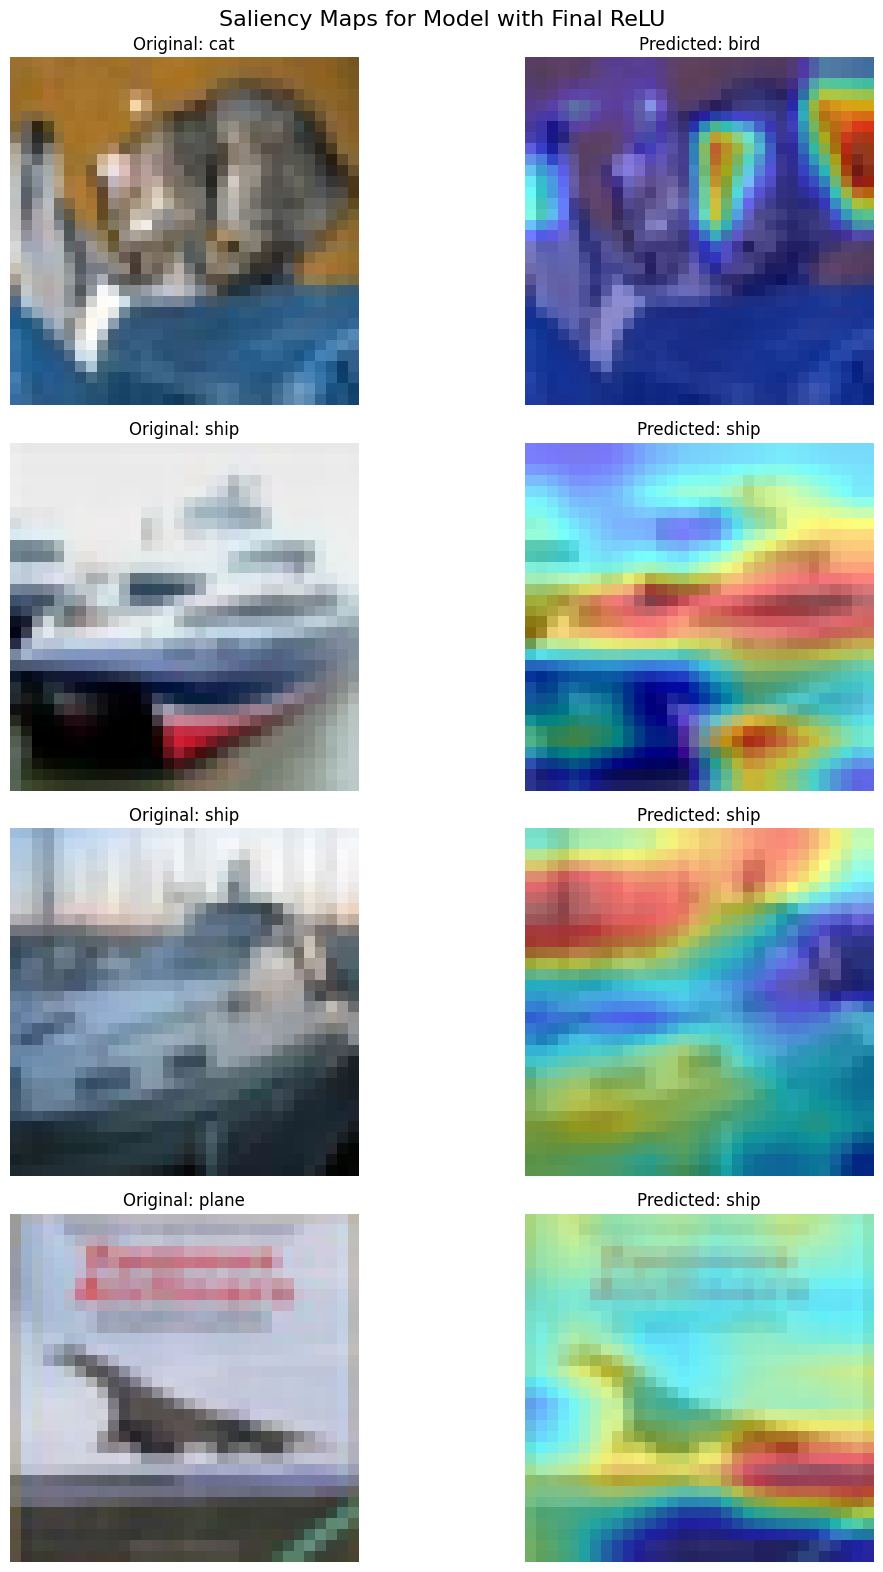


Generating saliency maps for model with final Tanh...


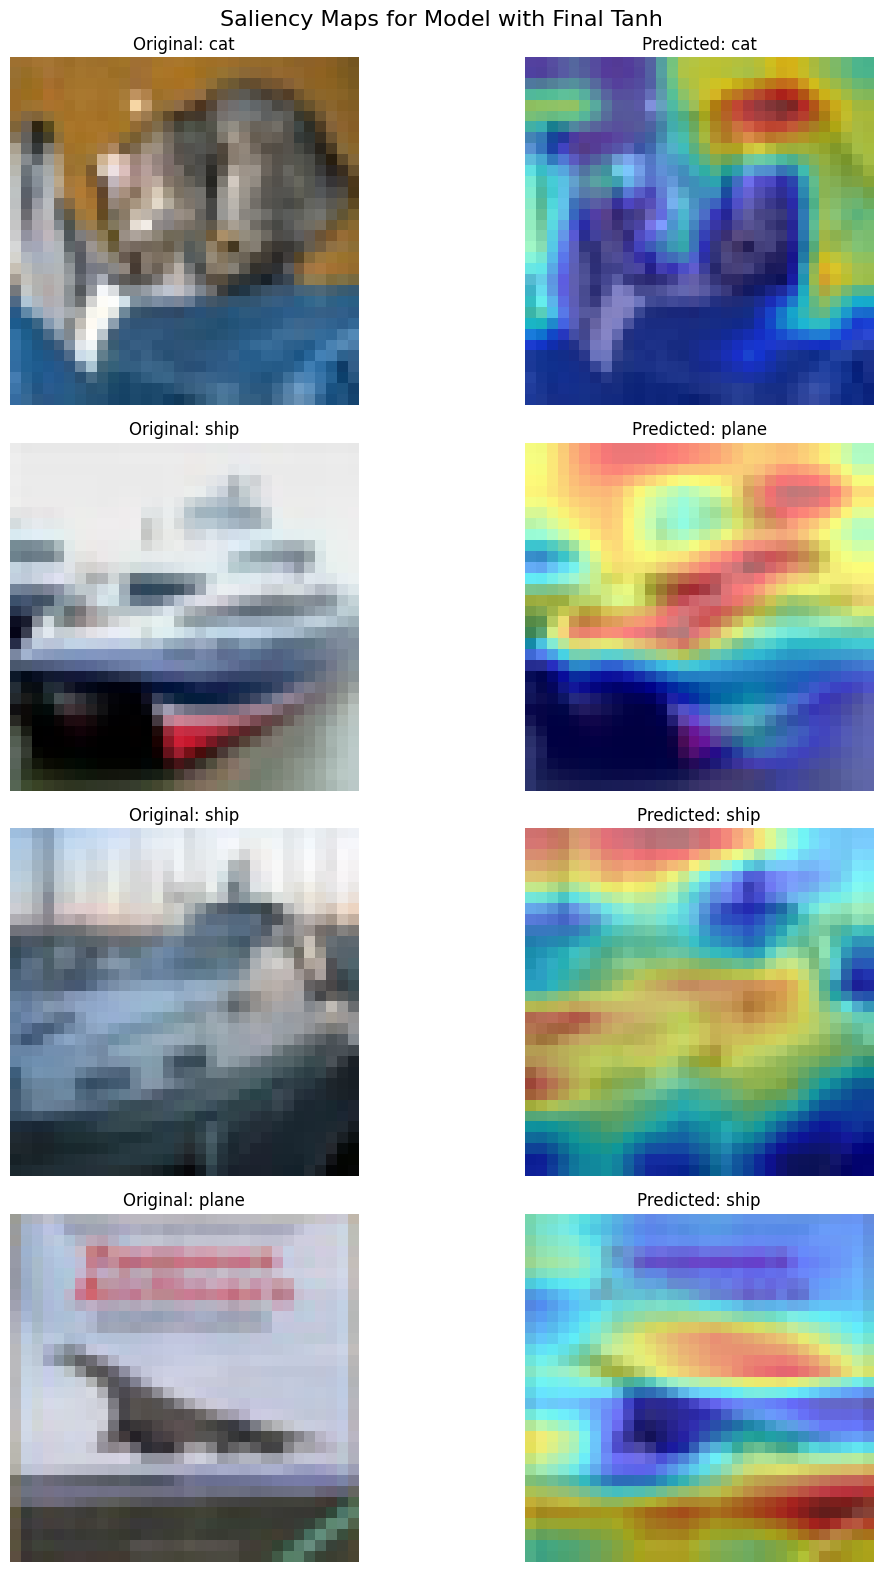

In [ ]:
# Generate saliency maps for both models
print("Generating saliency maps for standard model (without final ReLU)...")
visualize_saliency_maps(net_standard, "Standard Model")

print("\nGenerating saliency maps for model with final ReLU...")
visualize_saliency_maps(net_with_relu, "Model with Final ReLU")

print("\nGenerating saliency maps for model with final Tanh...")
visualize_saliency_maps(net_with_tanh, "Model with Final Tanh")


Generating side-by-side comparison of saliency maps...


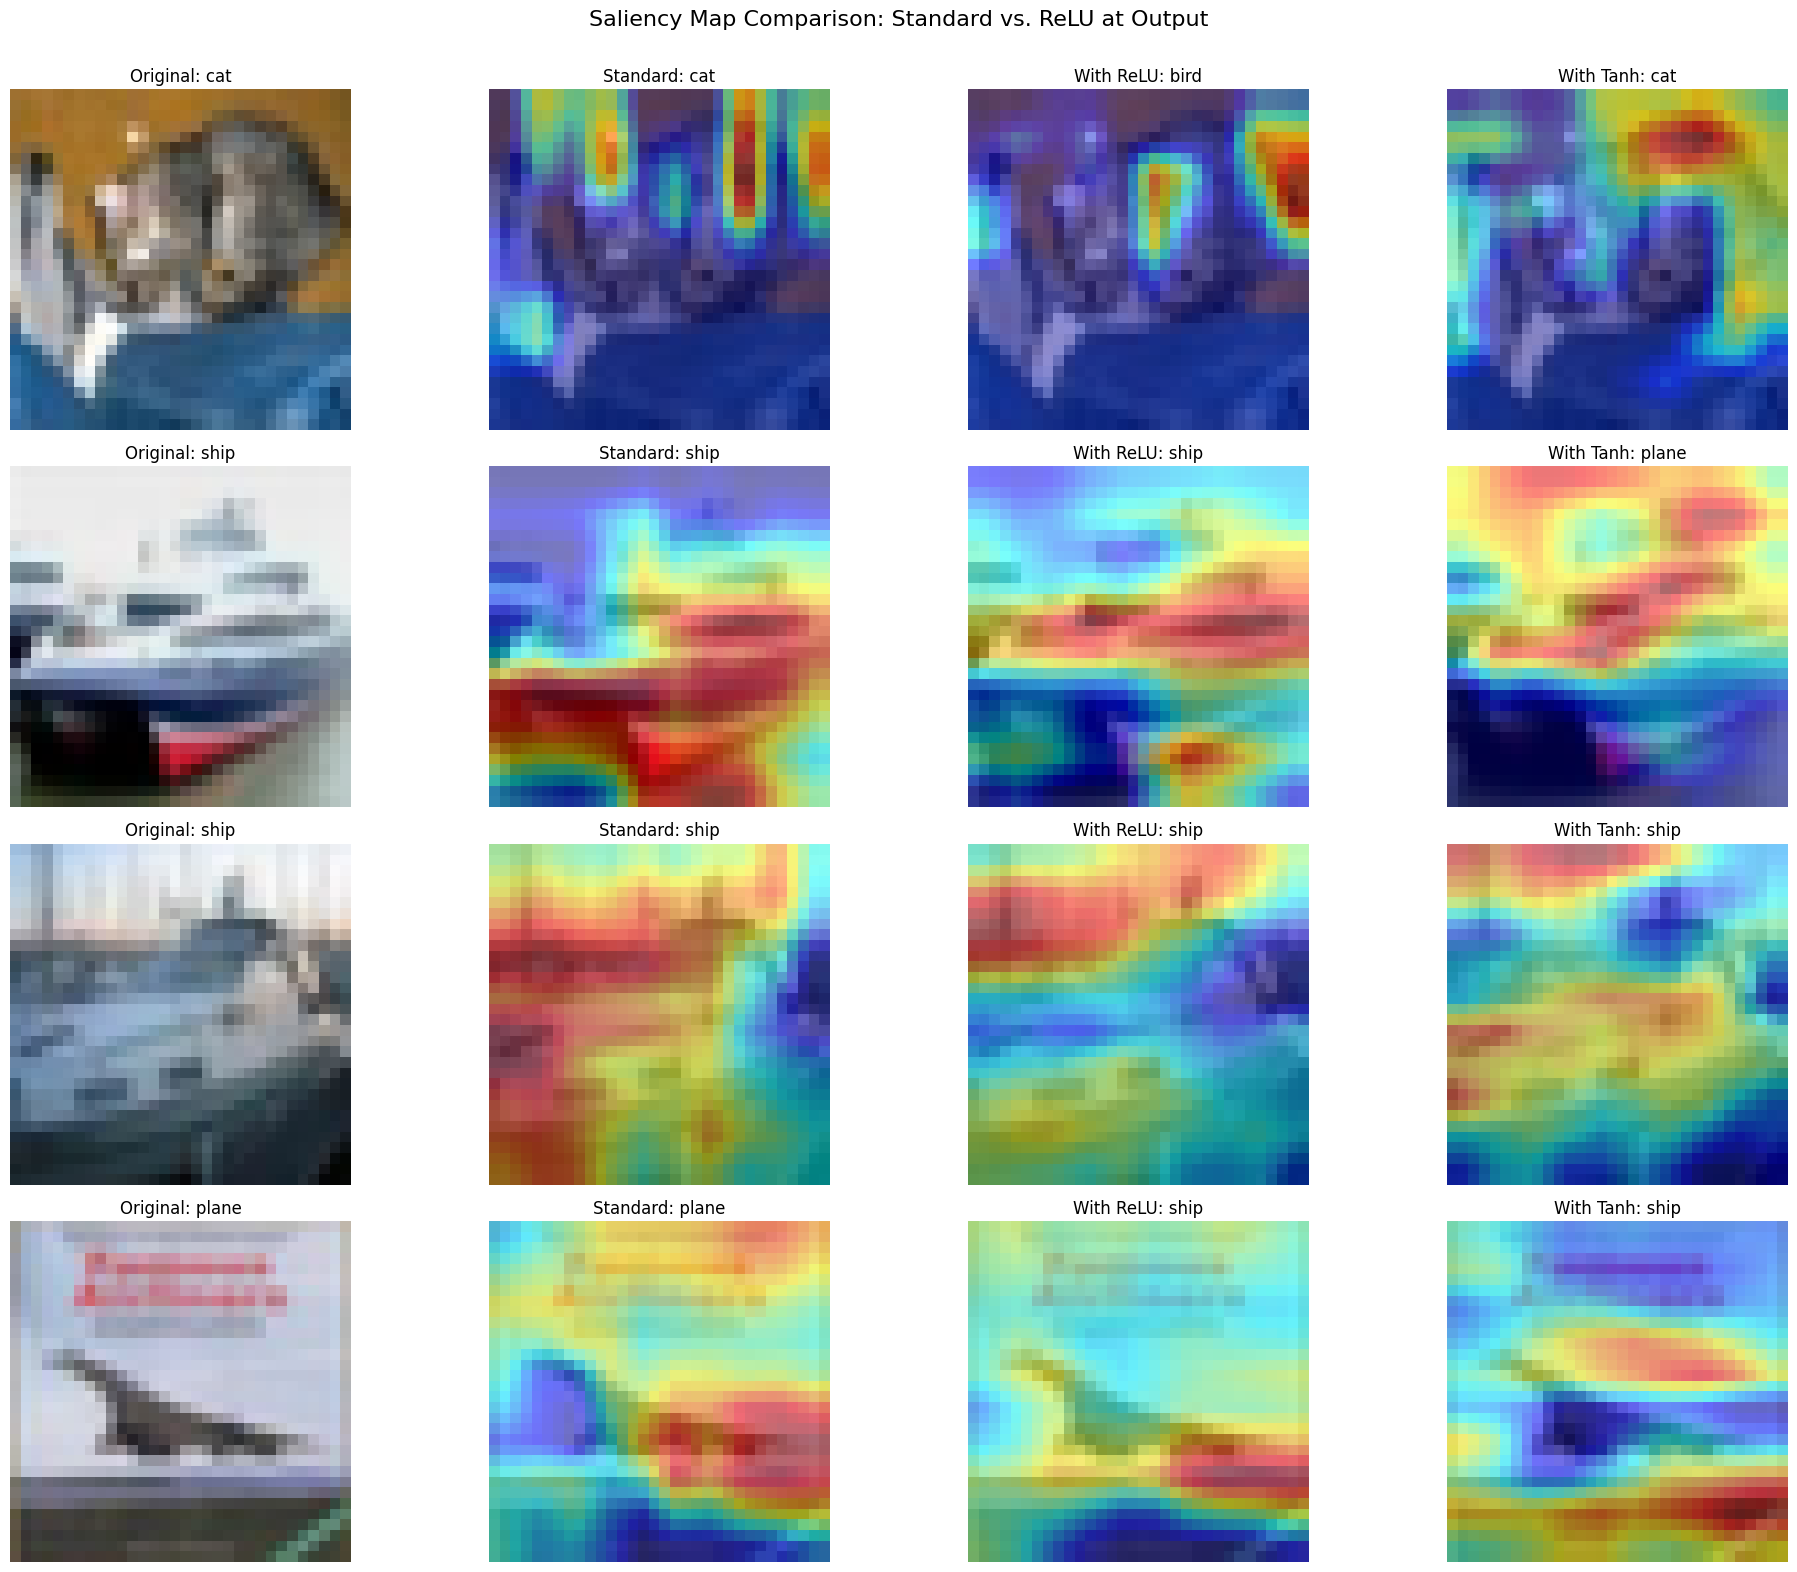

In [ ]:
# Let's also create a direct comparison between the two models
def compare_saliency_maps():
    """
    Generate and compare saliency maps between the two models
    """
    # Get a batch of test images
    dataiter = iter(testloader)
    images, labels = next(dataiter)

    # Create a figure for comparison
    # fig, axes = plt.subplots(4, 3, figsize=(15, 16))
    fig, axes = plt.subplots(4, 4, figsize=(20, 16))
    fig.suptitle('Saliency Map Comparison: Standard vs. ReLU at Output', fontsize=16)

    # Target layer for visualization
    target_layer_std = [net_standard.conv2]
    target_layer_relu = [net_with_relu.conv2]
    target_layer_tanh = [net_with_tanh.conv2]

    # Initialize GradCAM for both models
    cam_std = GradCAM(model=net_standard, target_layers=target_layer_std)
    cam_relu = GradCAM(model=net_with_relu, target_layers=target_layer_relu)
    cam_tanh = GradCAM(model=net_with_tanh, target_layers=target_layer_tanh)

    # Get predictions
    outputs_std = net_standard(images)
    outputs_relu = net_with_relu(images)
    outputs_tanh = net_with_tanh(images)
    _, predicted_std = torch.max(outputs_std, 1)
    _, predicted_relu = torch.max(outputs_relu, 1)
    _, predicted_tanh = torch.max(outputs_tanh, 1)

    for i in range(4):  # Process first 4 images
        # Original image
        img = images[i].cpu().numpy().transpose(1, 2, 0)
        img = img / 2 + 0.5  # unnormalize

        # Generate saliency maps for both models
        input_tensor = images[i].unsqueeze(0)

        # Standard model saliency
        grayscale_cam_std = cam_std(input_tensor=input_tensor, targets=None)
        grayscale_cam_std = grayscale_cam_std[0, :]
        vis_std = show_cam_on_image(img, grayscale_cam_std, use_rgb=True)

        # ReLU model saliency
        grayscale_cam_relu = cam_relu(input_tensor=input_tensor, targets=None)
        grayscale_cam_relu = grayscale_cam_relu[0, :]
        vis_relu = show_cam_on_image(img, grayscale_cam_relu, use_rgb=True)

        # Tanh model saliency
        grayscale_cam_tanh = cam_tanh(input_tensor=input_tensor, targets=None)
        grayscale_cam_tanh = grayscale_cam_tanh[0, :]
        vis_tanh = show_cam_on_image(img, grayscale_cam_tanh, use_rgb=True)

        # Display original image
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f'Original: {classes[labels[i]]}')
        axes[i, 0].axis('off')

        # Display standard model saliency
        axes[i, 1].imshow(vis_std)
        axes[i, 1].set_title(f'Standard: {classes[predicted_std[i]]}')
        axes[i, 1].axis('off')

        # Display ReLU model saliency
        axes[i, 2].imshow(vis_relu)
        axes[i, 2].set_title(f'With ReLU: {classes[predicted_relu[i]]}')
        axes[i, 2].axis('off')

        # Display Tanh model saliency
        axes[i, 3].imshow(vis_tanh)
        axes[i, 3].set_title(f'With Tanh: {classes[predicted_tanh[i]]}')
        axes[i, 3].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.93) #Previously 0.95
    plt.show()

# Generate side-by-side comparison
print("\nGenerating side-by-side comparison of saliency maps...")
compare_saliency_maps()

In [ ]:
del dataiter

### Testing 70/30 split with batch_size = k (Section B)

In [ ]:
# Split into training and validation set with a ratio of 70:30,
# Then set the batch_size = k for training.

total_samples = len(trainset)  # trainset taken from code from above
train_split_size = int(0.7 * total_samples)
val_split_size = total_samples - train_split_size

k_values = [4, 8, 16, 32, 64, 128]

print(f"Total training samples: {total_samples}")
print(f"Train: {train_split_size}, Validation: {val_split_size}")
print()

for k in k_values:
    batch_size = k
    updates_per_epoch = train_split_size // batch_size
    print(f"With batch size k = {batch_size}, estimated weight updates per epoch: {updates_per_epoch}")

Total training samples: 50000
Train: 35000, Validation: 15000

With batch size k = 4, estimated weight updates per epoch: 8750
With batch size k = 8, estimated weight updates per epoch: 4375
With batch size k = 16, estimated weight updates per epoch: 2187
With batch size k = 32, estimated weight updates per epoch: 1093
With batch size k = 64, estimated weight updates per epoch: 546
With batch size k = 128, estimated weight updates per epoch: 273


### Testing Standard CNN from section C with 70/30 split with batch_size = k.

In [ ]:
from torch.utils.data import random_split, DataLoader

# Perform 70:30 split
train_subset, val_subset = random_split(trainset, [train_split_size, val_split_size])

print("\nUsing 70:30 split with defined batch_size=k from above on net_standard model from section C:\n")

for k in k_values:
    print(f"Training model with batch size k = {k}:")

    trainloader = DataLoader(train_subset, batch_size=k, shuffle=True, num_workers=2)
    valloader = DataLoader(val_subset, batch_size=k, shuffle=False, num_workers=2)

    model = NetStandard()
    train_model(model, trainloader) #use already defined training function from above
    acc = evaluate_model(model, valloader) #use already defined evaluation function from above

    print(f"Validation Accuracy with batch size k = {k}: {acc:.2f}%\n")



Using 70:30 split with defined batch_size=k from above on net_standard model from section C:

Training model with batch size k = 4:
[1,  2000] loss: 2.236
[1,  4000] loss: 1.877
[1,  6000] loss: 1.701
[1,  8000] loss: 1.590
[2,  2000] loss: 1.494
[2,  4000] loss: 1.403
[2,  6000] loss: 1.372
[2,  8000] loss: 1.347
Finished Training
Accuracy on test images: 52.45%
Validation Accuracy with batch size k = 4: 52.45%

Training model with batch size k = 8:
[1,  2000] loss: 2.196
[1,  4000] loss: 1.771
[2,  2000] loss: 1.570
[2,  4000] loss: 1.491
Finished Training
Accuracy on test images: 46.62%
Validation Accuracy with batch size k = 8: 46.62%

Training model with batch size k = 16:
[1,  2000] loss: 2.231
[2,  2000] loss: 1.796
Finished Training
Accuracy on test images: 40.35%
Validation Accuracy with batch size k = 16: 40.35%

Training model with batch size k = 32:
Finished Training
Accuracy on test images: 30.41%
Validation Accuracy with batch size k = 32: 30.41%

Training model with bat